In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np

In [60]:
from sklearn.datasets.samples_generator import make_blobs

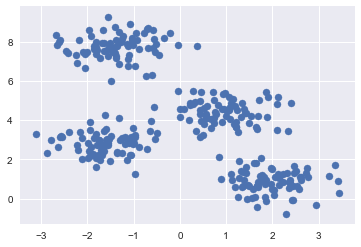

In [61]:
X,y_true = make_blobs(n_samples = 300,centers =4,cluster_std = 0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

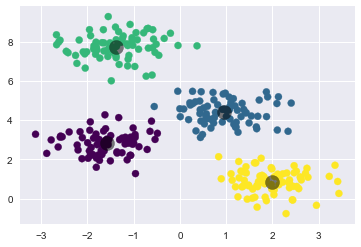

In [63]:
plt.scatter(X[:,0],X[:,1],c =y_kmeans,s=50,cmap='viridis')
#集群中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

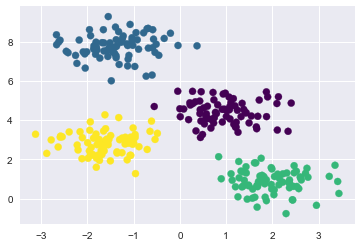

In [64]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    #1、随机选择簇
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        #2a:根据最近的中心分配标签。
        labels = pairwise_distances_argmin(X,centers)
        #2b:从点的角度寻找新的中心
        new_centers = np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        #2c:检查收敛性
        if np.all(centers == new_centers):
            break
        centers=new_centers
    return centers,labels

centers,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis');
        

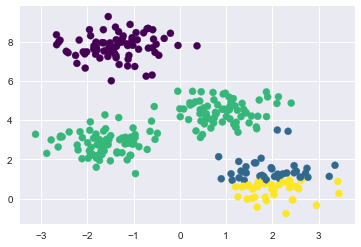

In [67]:
centers,labels = find_clusters(X,4,rseed=0)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

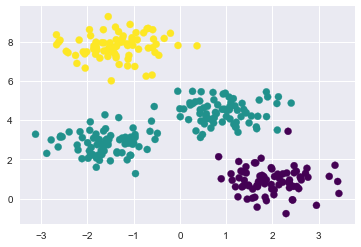

In [26]:
labels = KMeans(3,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [27]:
from sklearn.datasets import make_moons
X,y = make_moons(200,noise=0.05,random_state=0)

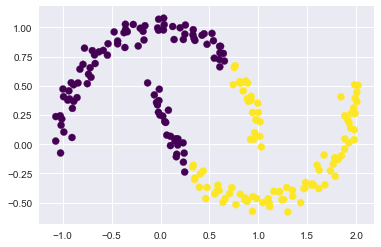

In [33]:
labels = KMeans(2,random_state=0).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c = labels,s=50,cmap='viridis')

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


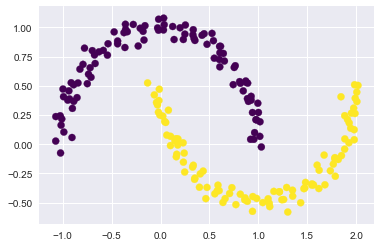

In [37]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

### 案例：数字

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [39]:
kmeans = KMeans(n_clusters=10,random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

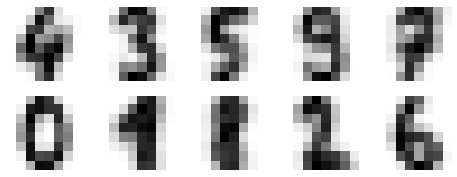

In [40]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [41]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask]=mode(digits.target[mask])[0]


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target,labels)

0.7935447968836951

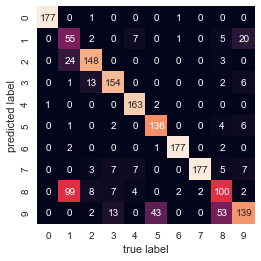

In [45]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [48]:
#t-SNE算法--不需要学
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

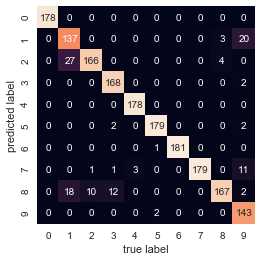

In [47]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 案例2：颜色压缩

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


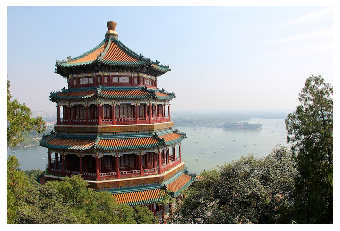

In [49]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [50]:
china.shape

(427, 640, 3)

In [51]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [52]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

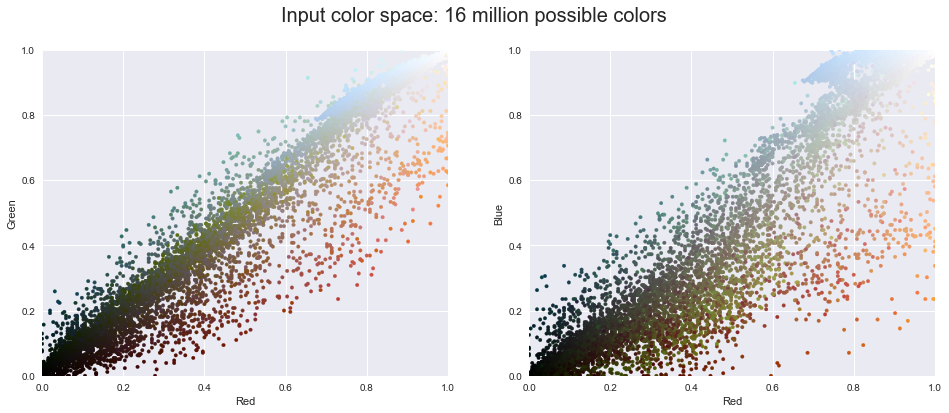

In [53]:
plot_pixels(data, title='Input color space: 16 million possible colors')

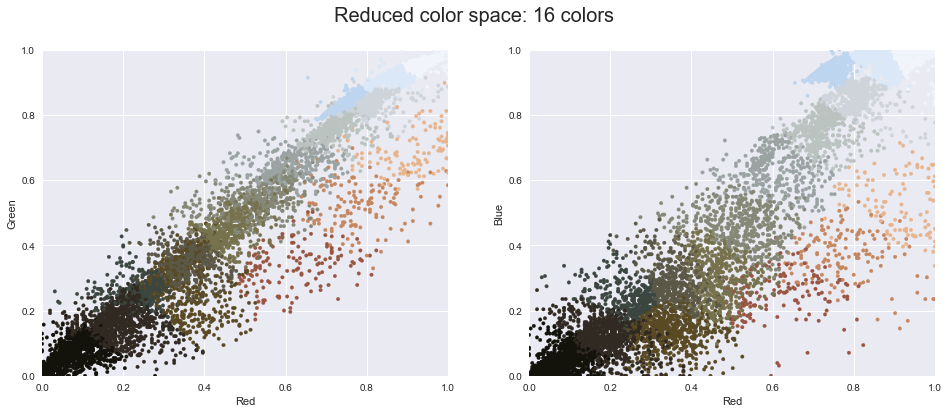

In [54]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

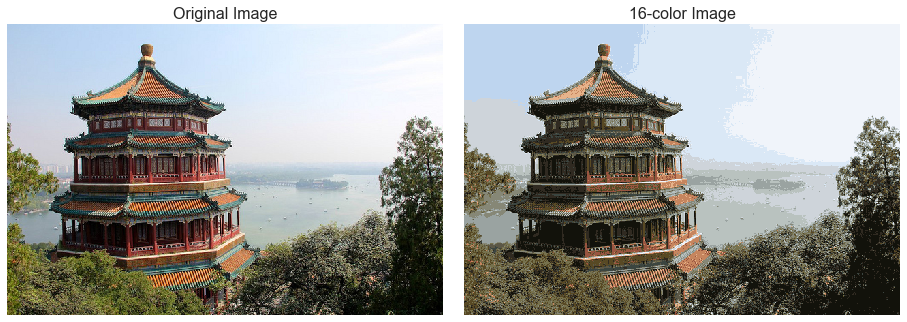

In [56]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);